# Домашняя работа на 1.11.20
Модель математического маятника **для любых углов**

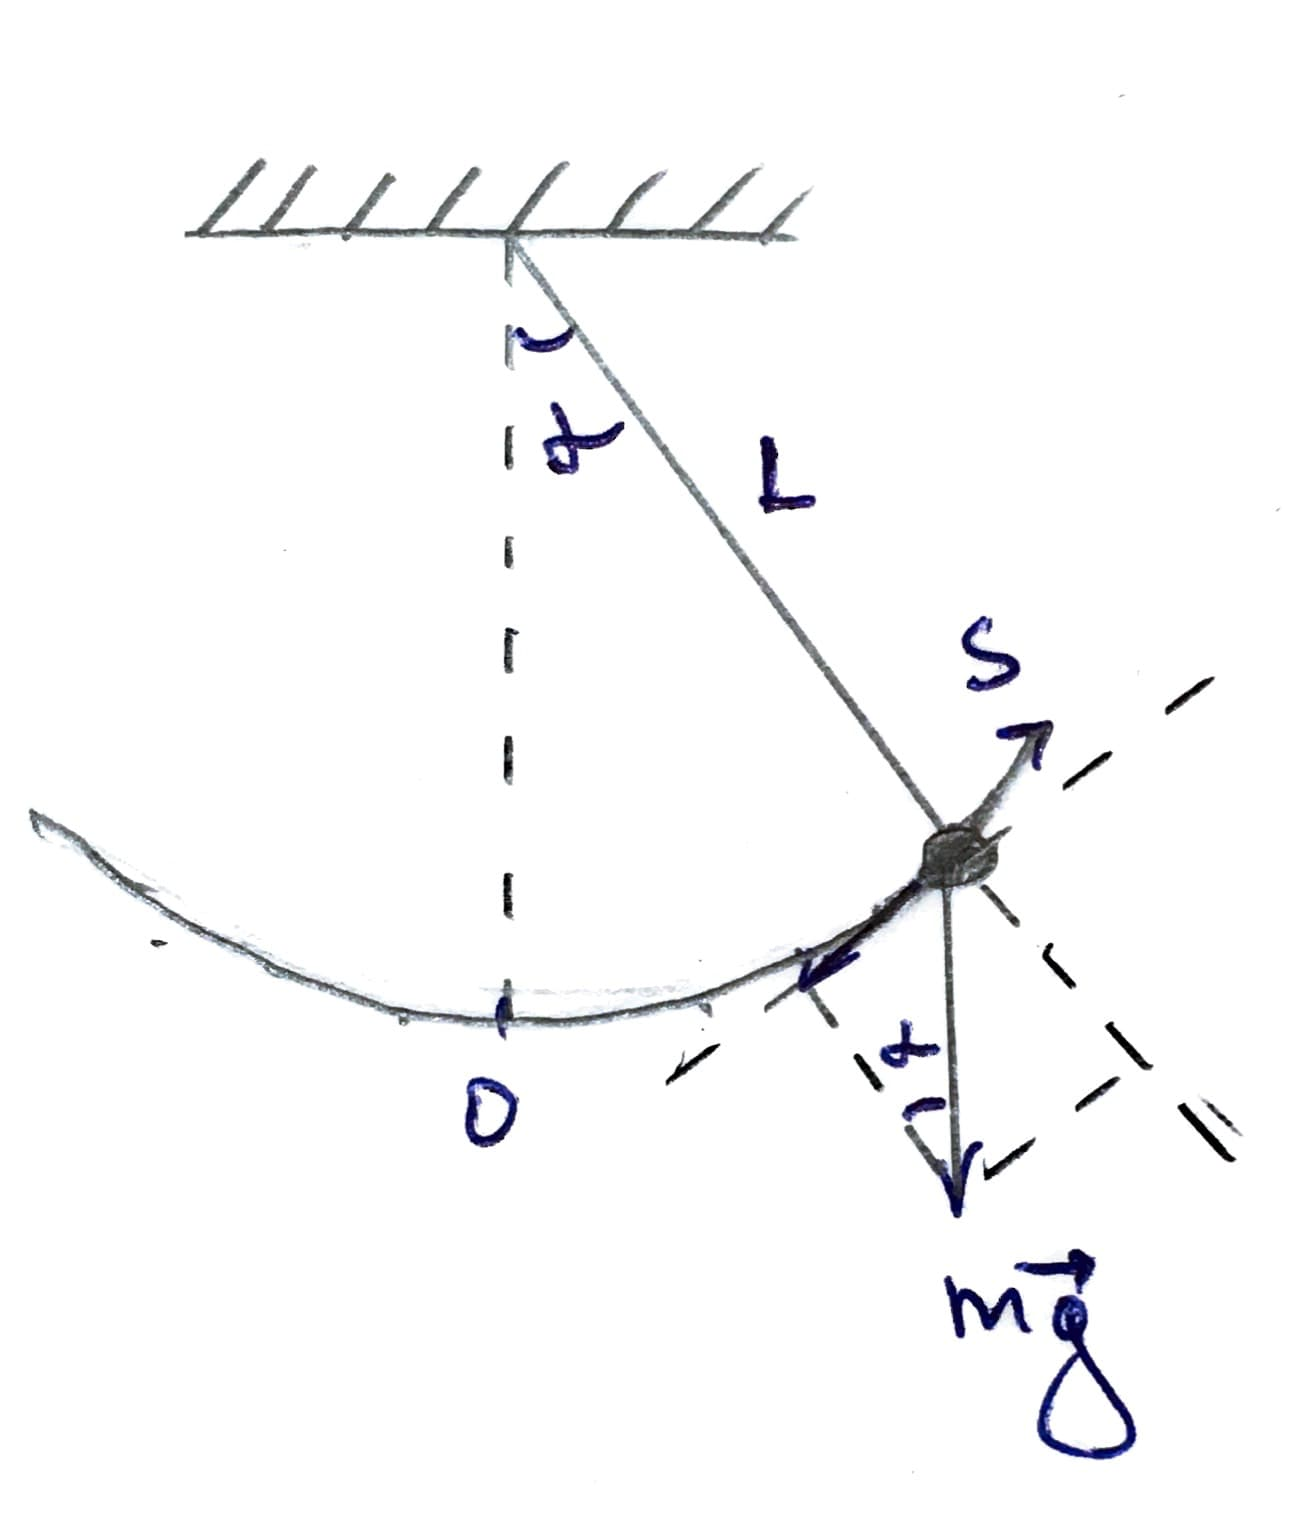

Из рисунка: 
$$a_{\tau} = -g\sin\alpha$$
$$\ddot{s}=-g\sin\frac{s}{L}$$
$$\ddot{s} + g\sin\frac{s}{L}=0$$

Если честно я даже не знаю есть ли решение этого дифференциального уровнения.
Но нам и не придётся его решать

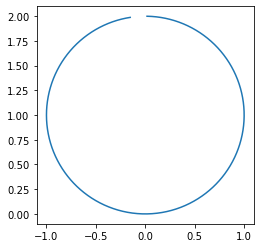

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

MODEL_DT = 0.001
g = 9.81

#-------------------------------------------------------
class Body:
    def __init__(self, alpha, L):
        self.alpha = alpha * math.pi/180 # перевод градусов в радианы
        self.L = L
        self.s = self.alpha * self.L
        self.V = 0
        self.trajectory = []
        self.trajectory_x = []
        self.trajectory_y = []
        
        
    def advance(self):
        self.trajectory.append(self.s)
        
        self.s += self.V * MODEL_DT
        self.alpha = self.s/self.L
        self.a = -g * np.sin(self.alpha)
        self.V += self.a * MODEL_DT

        
#-------------------------------------------------------
ball = Body(179,1)

for t in np.r_[0:3:MODEL_DT]:
    ball.advance()

#-------------------------------------------------------
# Это перевод из "s"-системы в обычну декартовую систему координат
for i in ball.trajectory:
    ball.trajectory_x.append(np.sin(i/ball.L))
    ball.trajectory_y.append(ball.L - np.cos(i/ball.L))

#-------------------------------------------------------
ax = plt.axes()
ax.set_aspect('equal') # масштаб

plt.plot(ball.trajectory_x, ball.trajectory_y)
plt.show()     